# Image segmentation by k-means

Author: YinTaiChen

## Packages

In [43]:
%matplotlib inline

import cv2

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.cluster import KMeans

## Feature Extraction

In [2]:
test_img = cv2.imread("Lenna.png")

In [17]:
height = test_img.shape[0]
width = test_img.shape[1]

features = []

for h in range(height):
    for w in range(width):

        pixel = test_img[h][w]
        features.append((h, w, pixel[0], pixel[1], pixel[2]))

In [19]:
len(features)

262144

## Clustering

In [26]:
pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(features)

In [29]:
len(pred)

262144

In [38]:
print(sum(pred))

125739


In [49]:
segment = np.zeros((512, 512, 3), dtype=np.uint8)

In [54]:
for i in range(len(pred)):
    #print(pred[i])
    height = features[i][0]
    width = features[i][1]
    #print(height, width)
    if pred[i] == 0:
        segment[height][width] = [255, 0, 0]
    elif pred[i] == 1:
        segment[height][width] = [0, 255, 0]

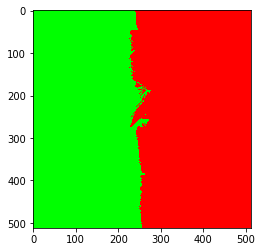

In [57]:
plt.imshow(segment)

In [68]:
colors = []

for i in range(100):
    colors.append([np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256)])

[[194, 225, 29], [67, 3, 108], [67, 205, 222], [117, 17, 167], [86, 212, 73], [222, 134, 74], [54, 68, 45], [22, 86, 227], [23, 33, 156], [94, 188, 184], [120, 146, 135], [226, 40, 168], [42, 27, 96], [153, 209, 118], [80, 83, 111], [254, 112, 72], [169, 225, 226], [188, 249, 205], [243, 37, 80], [2, 13, 71], [112, 164, 150], [107, 221, 218], [91, 54, 171], [183, 111, 42], [213, 54, 247], [104, 252, 17], [39, 62, 49], [216, 99, 119], [54, 178, 97], [139, 19, 239], [67, 148, 97], [73, 113, 247], [130, 234, 37], [183, 223, 46], [62, 7, 188], [142, 217, 191], [209, 220, 24], [22, 3, 162], [73, 13, 161], [231, 51, 249], [177, 9, 254], [162, 177, 116], [198, 93, 67], [202, 59, 5], [236, 156, 74], [231, 71, 89], [231, 94, 155], [237, 63, 4], [151, 180, 67], [2, 160, 249], [183, 198, 14], [162, 5, 14], [118, 93, 39], [60, 255, 36], [137, 65, 204], [230, 177, 202], [232, 242, 197], [227, 160, 56], [222, 176, 45], [138, 42, 19], [31, 71, 154], [122, 105, 157], [207, 0, 35], [103, 254, 121], [69

In [70]:
for k in range(2, 100):
    print(k)
    pred = KMeans(n_clusters=k, random_state=random_state).fit_predict(features)
    segment = np.zeros((512, 512, 3), dtype=np.uint8)
    
    for i in range(len(pred)):
        height = features[i][0]
        width = features[i][1]
        segment[height][width] = colors[pred[i]]
        
    result = Image.fromarray(segment)
    result.save("segment_"+str(k)+".jpg")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## Generate GIF

In [71]:
import imageio

In [74]:
images = []
for i in range(2, 100):
    filename = "segment_"+str(i)+".jpg"
    images.append(imageio.imread(filename))
for j in range(40):
    filename = "segment_"+str(99)+".jpg"
    images.append(imageio.imread(filename))
imageio.mimsave('danny_segmentation.gif', images)